In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


img_size = (224, 224)
train_path = "C:/Users/Maitr/Desktop/accuracy check/new data/train"
test_path = "C:/Users/Maitr/Desktop/accuracy check/new data/Test_Rescaled"


train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

test_data = test_gen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)


vgg = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in vgg.layers:
    layer.trainable = False


x = Flatten()(vgg.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)
output = Dense(4, activation='softmax')(x)  

model = Model(inputs=vgg.input, outputs=output)


model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


history = model.fit(
    train_data,
    epochs=20,
    validation_data=test_data
)


loss, acc = model.evaluate(test_data)
print("Test Accuracy:", acc)


train_loss, train_acc = model.evaluate(train_data)
print("Train Accuracy:", train_acc)


model.save("vgg19_fungal_classifier.h5")
print("Model Saved Successfully!")


Found 4448 images belonging to 4 classes.
Found 1846 images belonging to 4 classes.


C:\Users\Maitr\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 447s 3s/step - accuracy: 0.6652 - loss: 0.8117 - val_accuracy: 0.7849 - val_loss: 0.5334
Epoch 2/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 443s 3s/step - accuracy: 0.7880 - loss: 0.5368 - val_accuracy: 0.7589 - val_loss: 0.5731
Epoch 3/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 441s 3s/step - accuracy: 0.8269 - loss: 0.4524 - val_accuracy: 0.8510 - val_loss: 0.3714
Epoch 4/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 578s 4s/step - accuracy: 0.8471 - loss: 0.4034 - val_accuracy: 0.8380 - val_loss: 0.4112
Epoch 5/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 504s 4s/step - accuracy: 0.8671 - loss: 0.3490 - val_accuracy: 0.8082 - val_loss: 0.4801
Epoch 6/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 503s 4s/step - accuracy: 0.8856 - loss: 0.3126 - val_accuracy: 0.7882 - val_loss: 0.5302
Epoch 7/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 497s 4s/step - accuracy: 0.8943 - loss: 0.2891 - val_accuracy: 0.9122 - val_loss: 0.2202
Epoch 8/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 475s 3s/step - accuracy: 0.9011 - loss: 0.2743 - val_accu

Train Accuracy: 0.9498651027679443
Model Saved Successfully!


In [2]:
loss, acc = model.evaluate(test_data)
print("Test Accuracy:", acc)


58/58 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.8256 - loss: 0.4701
Test Accuracy: 0.8255687952041626


In [3]:
train_loss, train_acc = model.evaluate(train_data)
print("Train Accuracy:", train_acc)


139/139 ━━━━━━━━━━━━━━━━━━━━ 355s 3s/step - accuracy: 0.9541 - loss: 0.1315
Train Accuracy: 0.9541366696357727


In [5]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
model = tf.keras.models.load_model("vgg19_fungal_classifier.h5")

In [10]:
class_names = ['Healthy', 'Onychomycosis', 'Tinea Corporis', 'Tinea Nigra']
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_arr = image.img_to_array(img) / 255.0
    img_arr = np.expand_dims(img_arr, axis=0)

    prediction = model.predict(img_arr)
    class_index = np.argmax(prediction)
    confidence = np.max(prediction)

    print("Predicted Class:", class_names[class_index])
    print("Confidence:", round(confidence * 100, 2), "%")
predict_image("C:/Users/Maitr/Desktop/accuracy check/new data/Test_Rescaled/Tinea Nigra/rescaled_68_956481.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
Predicted Class: Tinea Nigra
Confidence: 92.27 %


In [11]:

true_labels = test_data.classes
class_names = list(test_data.class_indices.keys())
pred_probs = model.predict(test_data)
pred_labels = np.argmax(pred_probs, axis=1)


58/58 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step


In [13]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(true_labels, pred_labels)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[1007  179  141  186]
 [  93   25   17   24]
 [  33    9    9    6]
 [  85   10   12   10]]


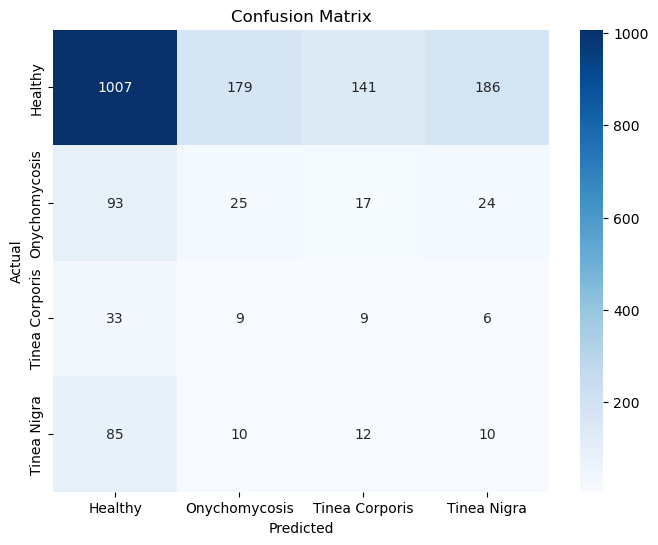

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
